## Implementing logistic Regression with L2 regularization  SGD  from Scratch

In [35]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [36]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
list(data.target_names)

['malignant', 'benign']

In [37]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [38]:
print(data.data.shape)

(569, 30)


# 1. Splitting Data

In [39]:
X = data.data
Y = data.target

In [40]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [41]:
#https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/Implement%20Stochastic%20Gradient%20Descent%20on%20Linear%20Regression%20.ipynb
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_tr)
x_train.shape

(398, 30)

In [42]:
x_test = sc.transform(x_te)
x_test.shape

(171, 30)

## 2. Implementing SGD on Logistic REGRESSION

In [43]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))

In [44]:
def grad1(w,x,y,λ,alpha,N,b):
    #sigmoid = 1/(1+np.exp(-(np.dot(x,w1))))
    f1 = y-sigmoid(w,x,b)
    w = (1-alpha*λ/N)*w + alpha*np.dot(x.T, f1)
    """" Logistic regression function : grad = (1-alpha*λ/N)*w + alpha*x*(y − σ(w.T*x+b))
    ref: https://drive.google.com/file/u/2/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing """ 
    return w

In [45]:
def grad2(w,x,y,λ,alpha,N,b):
    #sigmoid = 1/(1+np.exp(-(np.dot(x,w1))))
    f1 = y-sigmoid(w,x,b)
    w = (1-alpha*λ/N)*w + alpha*f1
    """" Logistic regression function : b = (1-alpha*λ/N)*w + alpha*(y − σ(w.T*x+b))
    ref: https://drive.google.com/file/u/2/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing """ 
    return w

In [46]:
# Initializing weights
weights = np.random.normal(0,1,data.data.shape[1])
weights=weights.reshape(-1,1)

In [47]:
temp_w = weights
alpha = 0.0001
λ = 28
# Number of training examples
m = x_train.shape[0]

# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 1
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = x_train[random_ids,:]
y_shuffled = y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        temp_w = grad1(weights,X_batch,Y_batch,λ,alpha,1,50)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights
weights[0:5]

array([[-0.01183664],
       [-0.00718141],
       [-0.01200581],
       [-0.01137842],
       [-0.00623979]])

In [48]:
# Initializing weights
b = np.random.normal(0,1,data.data.shape[1])
b=b.reshape(-1,1)

In [49]:
temp_b = b
# Number of training examples
m = x_train.shape[0]
alpha = 0.0001
λ = 50
N = alpha
# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 1
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = x_train[random_ids,:]
y_shuffled = y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        temp_b = grad2(weights,X_batch,Y_batch,λ,alpha,N,b)
        weights_b = temp_b
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights_b
weights_b[0]

array([0.58005149])

In [50]:
manual_sgd_predictions_tr = np.dot(x_train, weights)+weights_b[0]
manual_sgd_predictions_te = np.dot(x_test, weights)+weights_b[0]
print(manual_sgd_predictions_tr[0:5],'\n\n' , manual_sgd_predictions_te[0:5])

[[0.7298578 ]
 [0.71712914]
 [0.2740158 ]
 [0.24007334]
 [0.67593943]] 

 [[0.67340163]
 [0.62961827]
 [0.68243173]
 [0.78434238]
 [0.47979953]]


In [92]:
def pred(y_pred):
    N = len(y_pred)
    predict = []
    for i in range(N):
        if y_pred[i] >=0.58 : # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(manual_sgd_predictions_tr))/len(x_train))
print(1-np.sum(y_test - pred(manual_sgd_predictions_te))/len(x_test))

0.9974874371859297
1.0058479532163742


In [93]:
y_tr_pre = pred(manual_sgd_predictions_tr)
y_te_pre = pred(manual_sgd_predictions_te)

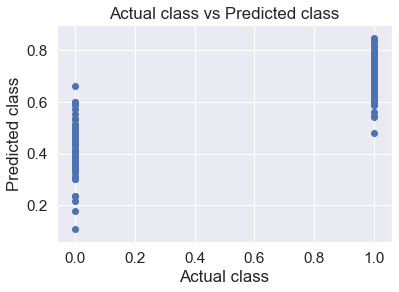

In [94]:
# Plotting the Scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, manual_sgd_predictions_te)
plt.xlabel("Actual class")
plt.ylabel("Predicted class")
plt.title("Actual class vs Predicted class")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

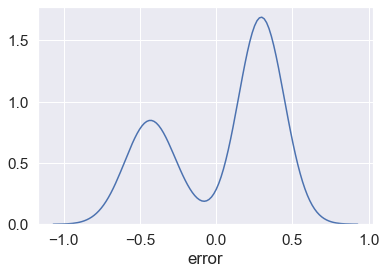

In [95]:
import seaborn as sns

delta_y = y_test - manual_sgd_predictions_te.flatten()
plt.xlabel("error")
sns.kdeplot(delta_y)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

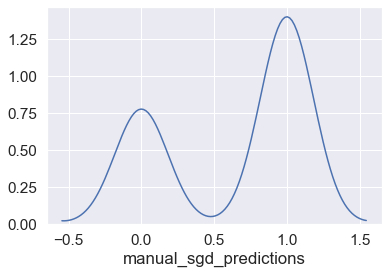

In [96]:
sns.kdeplot(y_te_pre)
plt.xlabel("manual_sgd_predictions")
plt.show

In [97]:
#function to get heatmap confusion matrix
def get_confusion_matrix(y_pred,y):
    df_cm = pd.DataFrame(confusion_matrix(y, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

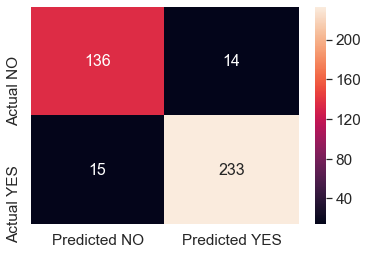

In [98]:
get_confusion_matrix(y_tr_pre,y_train)

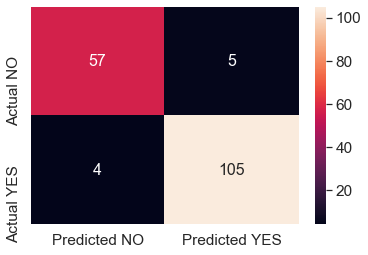

In [99]:
get_confusion_matrix(y_te_pre,y_test)

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_te_pre)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_te_pre)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_te_pre)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_te_pre)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, y_tr_pre))
print("Test confusion matrix")
print(confusion_matrix(y_test, y_te_pre))


Accuracy on test set: 95.322%
Precision on test set: 0.990
Recall on test set: 0.936
F1-Score on test set: 0.962
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Train confusion matrix
[[143   7]
 [ 21 227]]
Test confusion matrix
[[ 61   1]
 [  7 102]]


## 3. Implementing SKLEARN's SGD Regression

In [60]:
"https://scikit-learn.org/stable/modules/sgd.html"
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log", penalty='l2', max_iter=1000, learning_rate='constant' , eta0=0.001  )
sgd.fit(x_train, y_train)

sklearn_sgd_predictions = sgd.predict_proba(x_test)
y_tr_pre = sgd.predict(x_train)
y_te_pre = sgd.predict(x_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 


In [61]:
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

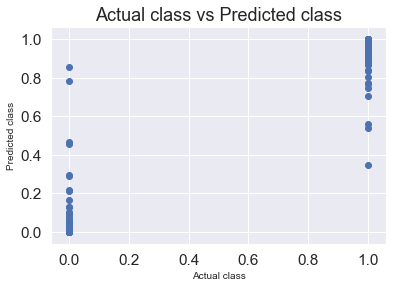

In [62]:
# Plotting the Scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, sklearn_sgd_predictions[:,1])
plt.xlabel("Actual class",size=10)
plt.ylabel("Predicted class",size=10)
plt.title("Actual class vs Predicted class",size=18)
plt.show()

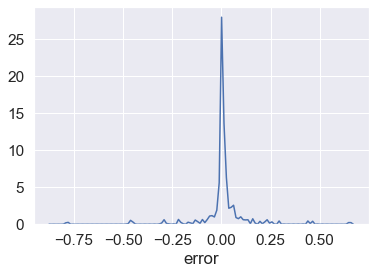

In [63]:
y_delta = y_test - sklearn_sgd_predictions[:,1]
plt.xlabel("error")
sns.kdeplot(y_delta)

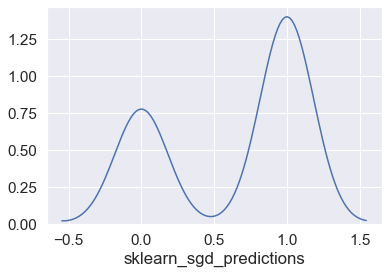

In [64]:
plt.xlabel("sklearn_sgd_predictions")
sns.kdeplot(y_te_pre)

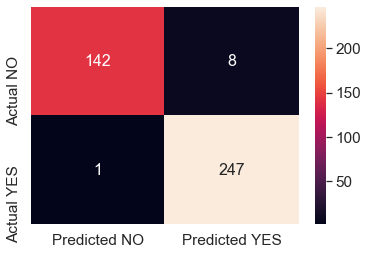

In [65]:
get_confusion_matrix(y_tr_pre,y_train)

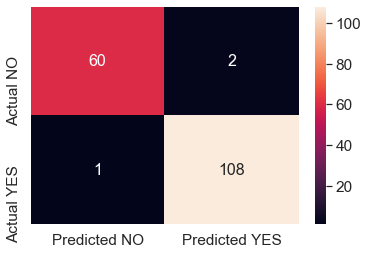

In [66]:
get_confusion_matrix(y_te_pre,y_test)

In [ ]:
print("%0.3f%%"%(accu

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_pred_new = y_te_pre

print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_new)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred_new)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred_new)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred_new)))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, y_tr_pre))
print("Test confusion matrix")
print(confusion_matrix(y_test, y_pred_new))


Accuracy on test set: 98.246%
Precision on test set: 0.982
Recall on test set: 0.991
F1-Score on test set: 0.986
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

Train confusion matrix
[[142   8]
 [  1 247]]
Test confusion matrix
[[ 60   2]
 [  1 108]]


In [68]:
# Creating the table using PrettyTable library

from prettytable import PrettyTable

# Initializing prettytable
ptable = PrettyTable()

numbering = [i for i in range(sklearn_sgd_weights.shape[1])]

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",weights)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights[0])

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   0   |     [-0.01183664]     |   -0.4389691593221069    |
|   1   |     [-0.00718141]     |   -0.3667060770593157    |
|   2   |     [-0.01200581]     |   -0.4313000185250534    |
|   3   |     [-0.01137842]     |   -0.42895309976475104   |
|   4   |     [-0.00623979]     |   -0.1509388123071394    |
|   5   |     [-0.00961243]     |   -0.12336454035499148   |
|   6   |     [-0.01127102]     |   -0.33846090122224987   |
|   7   |     [-0.01282854]     |   -0.4294881658046086    |
|   8   |     [-0.00509893]     |   -0.10973152034773474   |
|   9   |    [3.57772851e-06]   |   0.20415169369992706    |
|   10  |      [-0.0087556]     |   -0.3928426821142348    |
|   11  |     [-0.00083546]     |   -0.06843919168560568   |
|   12  |     [-0.00848647]     |    -0.333303095583102    |
|   13  |     [-0.008271